https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627

In [11]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [12]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.MNIST('MNIST', download=True, train=True, transform=transform)
valset = datasets.MNIST('MNIST', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [13]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
#print(images.shape)
#print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


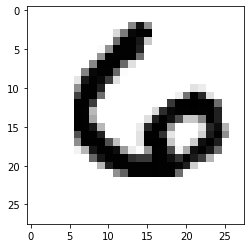

In [4]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

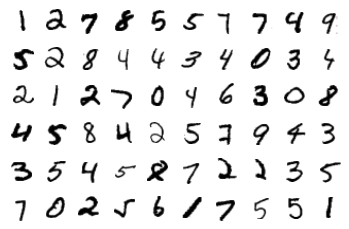

In [5]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [14]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [18]:
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.04967766303220577
Epoch 1 - Training loss: 0.0465638319252313
Epoch 2 - Training loss: 0.042613388647311436
Epoch 3 - Training loss: 0.03934022764698156
Epoch 4 - Training loss: 0.036064225827469855
Epoch 5 - Training loss: 0.034277077315614496
Epoch 6 - Training loss: 0.033368848903881095
Epoch 7 - Training loss: 0.030319685429478112
Epoch 8 - Training loss: 0.027495686560303274
Epoch 9 - Training loss: 0.025317689389743006
Epoch 10 - Training loss: 0.02417798019806122
Epoch 11 - Training loss: 0.02182546407860547
Epoch 12 - Training loss: 0.019478733615720393
Epoch 13 - Training loss: 0.018664471450326806
Epoch 14 - Training loss: 0.017539577272128383

Training Time (in minutes) = 2.526786708831787


In [22]:
correct_count, all_count = 0, 0
for images,labels in valloader:
    for i in range(len(labels)):
        img = images[i].view(1, 784)
        with torch.no_grad():
            logps = model(img)

    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
        correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 157

Model Accuracy = 0.9936305732484076


In [ ]:
torch.save(model, './my_mnist_model.pt') 